In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d
import os,sys

sys.path.append('/Users/ajc/Core/PyScript')
import readdata as rd
import os
import seaborn as sns
import geopy.distance
from matplotlib import cm

In [21]:
mesh_resfile= '/Users/ajc/Core/simulations/production/streams/SIM_13/mesh_coords_10m/ats_vis_surface_mesh.h5'
mesh_hres = rd.get_mesh_coords(mesh_resfile)

In [23]:
cells_file = np.loadtxt('/Users/ajc/Core/PreProcessing/ReactiveTransport/data/EFPC/reach_cells/vector_cells-10m.dat')
cells_file = np.array(cells_file,dtype=int)
def get_mesh_nodes(cells_file):
    csum = np.cumsum(cells_file)
    for c in csum:
        yield c
print (len(cells_file))

OSError: /Users/ajc/Core/PreProcessing/ReactiveTransport/data/EFPC/reach_cells/vector_cells-10m.dat not found.

In [4]:
#sim = 'FarmForest_NBGC_S2_dx500m_surfacefull_C'
sim = 'S6_dx1000m_C'
sim = 'FF_BGC_S2_dx10000m_B'
sim_mesh= ''

path='/Users/ajc/Core/simulations/production/streams/SIM_13/%s'%sim

outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/Q2/'

#os.mkdir(outfile)
infile = [os.path.join(path,'ats_vis_surface_data.h5'), os.path.join(path,'ats_vis_surface_mesh.h5') ]

In [5]:
mesh = rd.get_mesh_coords(infile[1])

In [6]:
variables = [(0,'DOM1'), (1,'O2(aq)'), (2,'NO3-'), (3,'HCO3-'),(4,'H+'), (5,'N2(aq)')]
#variables = [(0,'Tracer1'), (1,'Tracer2')]
#var = 'DOM1 conc'
var_c = 2
var = variables[var_c][0]
C_data = rd.GetSurfVarFromVis_All(infile[0],'surface-total_component_concentration',suffix='.cell.%s'%var)
Concentration = C_data['surface-total_component_concentration']
cycles = len(Concentration)
print (cycles)#, Concentration[0])



1201


In [7]:
     
sim_cells_file = np.loadtxt('/Users/ajc/Core/PreProcessing/ReactiveTransport/data/EFPC/reach_cells/efpc_vector_cells-1000m.dat')
sim_cells_file = np.array(sim_cells_file,dtype=int)
def get_sim_nodes(sim_cells_file):
    csum = np.cumsum(sim_cells_file)
    for c in csum:
        yield c

In [8]:
def get_mesh_mapping(C):
    p_mesh_res = get_mesh_nodes(cells_file)
    p_mesh_sim = get_sim_nodes(sim_cells_file)
    #print (len(sim_cells_file))
    xprev1, xprev2 = 0, 0
    coords_new = []
    X_mesh_new = []
    Y_mesh_new = []
    mapping = dict()
    j = 0
    #print ()
    for it1, it2 in zip(p_mesh_res,p_mesh_sim):
        l1 = len(C[xprev2:it2])
        l1 = 1 if l1 ==0 else l1
        l2 = int((it1 - xprev1)/(it2 -xprev2))
        x_temp = []
        y_temp = []
        #print ('L', l1, l2, l1*l2,it1 - xprev1, it2 - xprev2, xprev2, it2)
        #print('L1:' ,len(mesh_hres['x'][xprev1:xprev1+l1*l2]))
        
        for i in range(0, l1*l2):
            x_temp.append(mesh_hres['x'][xprev1 + i])
            y_temp.append(mesh_hres['y'][xprev1  + i])
        
        for x1,y1 in zip(x_temp,y_temp):
            X_mesh_new.append(x1)
            Y_mesh_new.append(y1)
        #print ('M:', len(X_mesh_new)) 
        #print ('------------')
        j = j + 1
        xprev1 = it1
        xprev2 = it2
    #print (j)
    #X_mesh_new = [c for x in X_mesh_new for c in x]
    #Y_mesh_new = [c for x in Y_mesh_new for c in x]
    m_new = dict()
    m_new['x'] = X_mesh_new
    m_new['y'] = Y_mesh_new
    return m_new
        

In [9]:
C = np.arange(0,len(Concentration[0]), 1)
mesh_new = get_mesh_mapping(C)

print (len(mesh_new['x']), len(C))
#15308

14893 231


In [17]:
def get_mapping(C):
    p_mesh_res = get_mesh_nodes(cells_file)
    p_mesh_sim = get_sim_nodes(sim_cells_file)
    print (len(C))
    xprev1, xprev2 = 0, 0
    C_new = []
    i = 0
    for it1, it2 in zip(p_mesh_res,p_mesh_sim):
        l1 = len(C[xprev2:it2])
        l1 = 1 if l1 ==0 else l1
        l2 = int((it1 - xprev1)/(it2 -xprev2))
        print ('L:', l1, l2, it2, xprev2)
        C_temp = np.zeros((l1,l2))
        for i in range(l1):
            C_temp[i] = C[xprev2:it2][i]
        xprev1 = it1
        xprev2 = it2
        for c in C_temp:
            C_new.append(c)
        #print (C_temp, l2)
        #i = i + 1
        #if (i >2):
        #    break
    C_new = [c for x in C_new for c in x]
    print ('LL: ',len(C_new))
    #print (C_new)
    return C_new
        

In [18]:
C_new1= get_mapping(C)

231
L: 2 46 2 0
L: 1 52 3 2
L: 2 62 5 3
L: 1 80 6 5
L: 1 77 7 6
L: 2 77 9 7
L: 3 74 12 9
L: 1 11 13 12
L: 2 50 15 13
L: 1 33 16 15
L: 1 45 17 16
L: 1 28 18 17
L: 1 98 19 18
L: 1 48 20 19
L: 1 44 21 20
L: 1 78 22 21
L: 1 93 23 22
L: 2 64 25 23
L: 1 21 26 25
L: 1 71 27 26
L: 2 78 29 27
L: 1 40 30 29
L: 1 63 31 30
L: 1 68 32 31
L: 1 56 33 32
L: 1 33 34 33
L: 1 67 35 34
L: 1 16 36 35
L: 1 76 37 36
L: 1 39 38 37
L: 1 35 39 38
L: 1 66 40 39
L: 1 52 41 40
L: 1 41 42 41
L: 1 40 43 42
L: 1 66 44 43
L: 1 40 45 44
L: 1 61 46 45
L: 1 42 47 46
L: 1 29 48 47
L: 1 64 49 48
L: 1 48 50 49
L: 1 71 51 50
L: 1 39 52 51
L: 1 38 53 52
L: 1 73 54 53
L: 1 51 55 54
L: 1 81 56 55
L: 1 24 57 56
L: 1 39 58 57
L: 1 69 59 58
L: 1 69 60 59
L: 1 74 61 60
L: 1 83 62 61
L: 1 44 63 62
L: 1 44 64 63
L: 1 50 65 64
L: 1 56 66 65
L: 1 68 67 66
L: 1 73 68 67
L: 1 32 69 68
L: 1 69 70 69
L: 2 56 72 70
L: 2 82 74 72
L: 2 83 76 74
L: 1 34 77 76
L: 2 51 79 77
L: 1 77 80 79
L: 2 60 82 80
L: 1 43 83 82
L: 1 34 84 83
L: 2 99 86 84
L

IndexError: index 0 is out of bounds for axis 0 with size 0

-84.40353179578331 -84.22480296335239
35.91596336394121 36.0396189243694


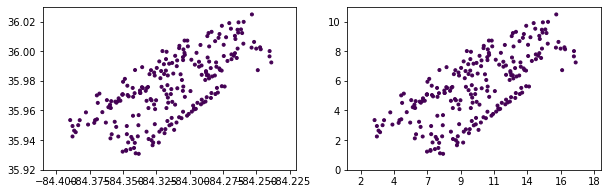

In [12]:
def get_limits():
    fig, ax = plt.subplots(1,2,figsize=(10,3))#,subplot_kw={"projection": "3d"})

    ax[0].scatter(mesh['x'],mesh['y'],marker=".",c=mesh['z'])
    xmin, xmax = ax[0].get_xlim()
    ymin, ymax = ax[0].get_ylim()
    print(xmin,xmax)
    print(ymin,ymax)
    # Coweeta
    #X0 = [-83.48, -83.40]
    #Y0 = [35.03, 35.08]
    #EFPC
    X0 = [-84.41, -84.22]
    Y0 = [35.92, 36.03]
    
    #X0 = [-84.22, -84.4]
    #Y0 = [35.92, 36.025]
    
    ax[0].set_xlim(X0)
    ax[0].set_ylim(Y0)
    xmin, xmax = ax[0].get_xlim()
    ymin, ymax = ax[0].get_ylim()

    xx = geopy.distance.geodesic(xmin,xmax).km + 0.07
    yy = geopy.distance.geodesic(ymin,ymax).km + 0.455
    Xlabels = np.round(np.linspace(0,xx,10,dtype=int),2)
    Ylabels = np.round(np.linspace(0,yy,7,dtype=int),2)

    #ax = fig.add_subplot(122)
    ax[1].scatter(mesh['x'],mesh['y'],marker=".",c=mesh['z'])
    #print (len(X_mesh),len(Y_mesh),len(Z_mesh))
    #ax[1].plot_surface(X_mesh, Y_mesh, [Z_mesh,Z_mesh], cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax[1].set_xticklabels(Xlabels)
    ax[1].set_yticklabels(Ylabels)
    ax[1].set_xlim(xmin,xmax)
    ax[1].set_ylim(ymin,ymax)
    #plt.gca().invert_xaxis()
    plt.show()
    return X0, Y0, Xlabels, Ylabels
    
X0, Y0, Xlabels,Ylabels = get_limits()

In [13]:
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/2021/Q2/'

NO3- 2
231
LL:  12891
Max:  231 417.5879389457901 41.60596874201982


ValueError: 'c' argument has 12891 elements, which is not acceptable for use with 'x' with size 14893, 'y' with size 14893.

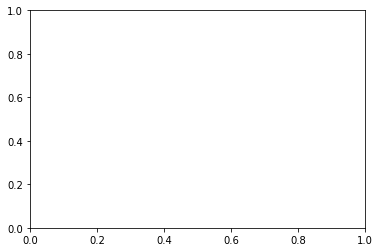

In [14]:
#Write solute concentration images to a directory
#%matplotlib qt

centroid = []
thick = [1,1,1]
count = 0

time = [np.round(t*360/86400,2) for t in range(cycles)]
RR = []
to_micro = 1e+6
start = 1199
end = start + 1
for k in range(start,cycles,1):
    var = variables[var_c][1]
    print (var, var_c)
    fig, ax = plt.subplots(1,1,figsize=(6,4))
    
    ran = Concentration[k]
    
    ran = np.array([r*1e-3*to_micro if r>0 else 1e-12 for r in ran])
    
    C_up = get_mapping(ran)
    #print (ran)
    xx = np.where(ran == np.max(ran))
    #print (ran)
    print ('Max: ',len(ran),np.max(ran), np.min(ran))#, ran)#, np.min(ran), xx)#, ran[pos],ran.shape)
    
    l_max = 100
    if var == 'NO3-':
        if np.max(ran) <51 or ran[0]=='inf':
            l_max = 50
        else:
            l_max = 500
    elif var == 'DOM1':
        if np.max(ran) <401 or ran[0]=='inf':
            #print (np.max(ran))
            #print (ran[180:200])
            l_max = np.max(ran)#100
        else:
            l_max = np.max(ran)#1000
    #print (X_mesh_res[0])
    
    #ax.scatter(mesh_hres['x'],mesh_hres['y'],marker=".",c='blue',s=1) # mesh resolution
    sc = ax.scatter(mesh_new['x'],mesh_new['y'],marker=".",c=C_up,s=0.1, cmap=plt.get_cmap('viridis'), vmin=10,vmax=l_max,norm=matplotlib.colors.LogNorm()) # mesh resolution
    
    #sc = ax.scatter(X_mesh[ss:],Y_mesh[ss:],marker=".",c=ran[ss:],cmap=plt.get_cmap('jet'),vmin=1.e-6,vmax=l_max,norm=matplotlib.colors.LogNorm())
    ax.text(mesh['x'][-1]-0.02,mesh['y'][-1]+0.075, 'Time = %s [d]'%time[k],fontsize=12,fontstyle='normal')
    cb = plt.colorbar(sc,pad=0.02,fraction=0.046)
    cb.ax.set_ylabel(r'Concentration [$\mu$M]',labelpad=-70, y=1.1,rotation=0,fontsize=12)
    #cb.ax.set_ylabel(r'Concentration [M/liter]',labelpad=-70, y=1.1,rotation=0,fontsize=12)

    
    ax.set_xlim(X0)
    ax.set_ylim(Y0)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_xticklabels(Xlabels)
    ax.set_yticklabels(Ylabels)
    ax.set_xlabel('Distance [km]',fontsize=12, fontweight='normal')
    ax.set_ylabel('Distance [km]',fontsize=12, fontweight='normal')
    plt.tight_layout(h_pad=1)
    #plt.gca().invert_xaxis()
    #plt.text(X_mesh[-1]-0.02,Y_mesh[-1]+0.025, 'Time [hr] = %s'%time[k])
    
    
    #plt.savefig(outfile + 'fig-efpc-%s.png'%(sim),dpi=200)
    
    count =1 + k
    if count >end:
        break
    plt.close()
#print (l_max)

In [ ]:




#cells_file = np.loadtxt('/Users/ajc/Core/PreProcessing/ReactiveTransport/data/EFPC/efpc_vector_cells-500m.dat')
#cells_file = np.array(cells_file,dtype=int)
#print (cells_file[:5])
def get_nodes(cells_file):
    csum = np.cumsum(cells_file)
    for c in csum:
        yield c
        
xprev = 0
    
def plot_lines():
    p = get_nodes(cells_file)
    xprev = 0
    for i,x in enumerate(p):
        #print (i, x, xprev)
        #pos = cells_file[xprev]
        
        #print (i, x, xprev, pos)
        cx , cy = X_mesh[xprev:x], Y_mesh[xprev:x]
        #print (cx,cy)
        #plt.scatter(cx,cy,marker='o',color='r',s=15)
        plt.plot(cx,cy,'-',color='k')
        xprev = x
        #for cx, cy in zip(X_mesh[pos[0]:pos[-1]], Y_mesh[pos[0]:pos[-1]]):
        #    break
        #    print (cx, cy)
        #    plt.plot(cx,cy,'-',color='k')
        #    #plt.scatter(cx,cy,color='r')
        #    #break
        if i ==1400:
            break
    #plt.show()
        #break
    """   
    for I in range(len(X_mesh)):
        c1 , c2 = X_mesh[I:I+2],Y_mesh[I:I+2]
        print (c1,c2)
        plt.plot(c1,c2,'-',color='k')
        plt.scatter(c1,c2,color='r')
        if I >10:
            break
    """
#plot_lines()

